# Build quilt data package on the fly

`pip install quilt`

In [1]:
import quilt

pkg_name = 'iconix/deephypebot'

# start with an empty package -- revision1
#quilt.build(pkg_name)

In [2]:
import os
import pandas as pd

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '..', 'datasets')
reviews_f = 'reviews_and_metadata'

reviews_5yrs_f = os.path.join(DATA_DIR, f'{reviews_f}_5yrs.json')
reviews_5yrs_df = pd.read_json(reviews_5yrs_f)
print(f'num_reviews: {len(reviews_5yrs_df)}')
reviews_5yrs_df.head()

num_reviews: 25160


,artist,artist_id,audio_features,author,content,date_published,dek,desc,direction,domain,...,pages_rendered,post_title,posturl,rendered_pages,sitename,song_title,spotify_genres,spotify_id,total_pages,word_count
0,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,"{'danceability': 0.486, 'energy': 0.638, 'key'...",None,New Music\nMt. Joy reached out to us with the ...,2017-11-20T13:33:10.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.buffablog.com,...,NaN,"Mt. Joy - ""Silver Lining""",http://www.buffablog.com/mt-joy-silver-lining/,1.0,buffaBLOG,Silver Lining,"[deep new americana, folk-pop, indie pop, mode...",2fpDrL2Vpee0JnM6AoUFvl,1,86
1,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,"{'danceability': 0.486, 'energy': 0.638, 'key'...",Martin,Folk rockers Mt. Joy have debuted their new so...,2017-11-16T00:00:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.discobelle.net,...,NaN,Mt. Joy – Silver Lining | Discobelle.net,http://www.discobelle.net/2017/11/16/mt-joy-si...,1.0,Discobelle,Silver Lining,"[deep new americana, folk-pop, indie pop, mode...",2fpDrL2Vpee0JnM6AoUFvl,1,83
2,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,"{'danceability': 0.486, 'energy': 0.638, 'key'...",Nasko,You know we're digging Mt. Joy.\nTheir new sin...,2017-11-14T14:30:26.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.stereofox.com,...,NaN,Mt. Joy - Silver Lining | Stereofox Music Blog,https://www.stereofox.com/mt-joy-silver-lining/,1.0,Stereofox,Silver Lining,"[deep new americana, folk-pop, indie pop, mode...",2fpDrL2Vpee0JnM6AoUFvl,1,75
3,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,"{'danceability': 0.486, 'energy': 0.638, 'key'...",D & d,"Nothing against the profession, but the U.S. h...",2018-06-20T10:53:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,indieobsessive.blogspot.com,...,NaN,“Silver Lining” by Mt. Joy – A Song Review,http://indieobsessive.blogspot.com/2017/11/sil...,1.0,Indie Obsessive,Silver Lining,"[deep new americana, folk-pop, indie pop, mode...",2fpDrL2Vpee0JnM6AoUFvl,1,416
4,Opia,70zHrrrPfBkVV44AEhFyyh,"{'danceability': 0.609, 'energy': 0.623, 'key'...",Nat Morawski,Connecticut duo Opia have released a guitar he...,2018-05-24T00:00:00.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,acidstag.com,...,NaN,Opia – ‘Four Winds’,https://acidstag.com/2018/05/opia-four-winds/,1.0,acid stag,Four Winds,[vapor soul],3NPiANHZYahLZhUT00GwTw,1,148


In [3]:
# https://stackoverflow.com/a/38231651

# quilt cannot handle column 'audio_features' because it is a dict - convert it into multiple columns
# convert original 'audio_features' column from dict to JSON string
audio_df = reviews_5yrs_df['audio_features'].apply(pd.Series)[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
str_df = reviews_5yrs_df['audio_features'].astype('|S')
reviews_5yrs_df = pd.concat([reviews_5yrs_df.drop(['audio_features'], axis=1), str_df, audio_df], axis=1)
reviews_5yrs_df.columns

Index(['artist', 'artist_id', 'author', 'content', 'date_published', 'dek',
       'desc', 'direction', 'domain', 'error', 'excerpt', 'extract_url',
       'failed', 'genius_id', 'genres', 'itemid', 'lang', 'lead_image_url',
       'masked_content', 'messages', 'next_page_url', 'pages_rendered',
       'post_title', 'posturl', 'rendered_pages', 'sitename', 'song_title',
       'spotify_genres', 'spotify_id', 'total_pages', 'word_count',
       'audio_features', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [4]:
from quilt.data.iconix import deephypebot

# put data in it
deephypebot._set(['reviews_and_metadata_5yrs'], reviews_5yrs_df)
deephypebot.reviews_and_metadata_5yrs()

,artist,artist_id,author,content,date_published,dek,desc,direction,domain,error,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,None,New Music\nMt. Joy reached out to us with the ...,2017-11-20T13:33:10.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.buffablog.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
1,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Martin,Folk rockers Mt. Joy have debuted their new so...,2017-11-16T00:00:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.discobelle.net,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
2,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Nasko,You know we're digging Mt. Joy.\nTheir new sin...,2017-11-14T14:30:26.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.stereofox.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
3,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,D & d,"Nothing against the profession, but the U.S. h...",2018-06-20T10:53:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,indieobsessive.blogspot.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
4,Opia,70zHrrrPfBkVV44AEhFyyh,Nat Morawski,Connecticut duo Opia have released a guitar he...,2018-05-24T00:00:00.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,acidstag.com,NaN,...,-6.575,1.0,0.1020,0.190000,0.000034,0.0625,0.5820,87.974,223814.0,4.0
5,Opia,70zHrrrPfBkVV44AEhFyyh,Adeel Amini,Now this is inventive. Not that we'd expect an...,2018-05-17T11:30:22.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,pressplayok.com,NaN,...,-6.575,1.0,0.1020,0.190000,0.000034,0.0625,0.5820,87.974,223814.0,4.0
6,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,Oblivious Pop,Since the very first release from Elohim about...,2018-06-20T16:01:00.000Z,NaN,\n\n?\n\n,ltr,www.obliviouspop.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
7,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,New Music\nNow this is how you get a party sta...,2018-05-09T22:44:56.000Z,NaN,\n\n?\n\n,ltr,www.buffablog.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
8,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,"This Friday, April 27th, ELOHIM releases her l...",None,NaN,\n\n?\n\n,ltr,www.theautumnroses.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
9,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,What a long way Elohim has come since the rele...,2018-04-24T17:12:03.000Z,NaN,\n\n?\n\n,ltr,www.highclouds.org,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0


In [5]:
# revision2 - using https://github.com/iconix/openai/blob/0798aa240dd141cb3e66f54f5715dfc02caa3e22/datasets/reviews_and_metadata_5yrs.json
quilt.build(pkg_name, deephypebot)

In [6]:
# log in and push to the registry
quilt.login()
quilt.push(pkg_name, is_public=True)

Launching a web browser...
If that didn't work, please visit the following URL: https://pkg.quiltdata.com/login
Failed to launch the browser: Command '['xdg-open', 'https://pkg.quiltdata.com/login']' returned non-zero exit status 3.

Enter the code from the webpage: eyJjb2RlIjogImMwZGYxNzI5LWY4YzMtNDA0MS05YmNjLWEyZjkyZjZjNmU1NyIsICJpZCI6ICJkMzI3ZTdkYS1lZDFiLTRiMWMtYTFlMC1lM2ZkNzk4NDJlMzkifQ==
Fetching upload URLs from the registry...


  0%|          | 0.00/36.8M [00:00<?, ?B/s]

Uploading 1 fragments (36757347 bytes)...


100%|██████████| 36.8M/36.8M [00:03<00:00, 12.2MB/s]


Uploading package metadata...
Updating the 'latest' tag...
Push complete. iconix/deephypebot is live:
https://quiltdata.com/package/iconix/deephypebot


In [7]:
quilt.inspect(pkg_name)

/home/ubuntu/.local/share/QuiltCli/quilt_packages/pkgs/Quilt/iconix/deephypebot
└── reviews_and_metadata_5yrs: shape (25160, 45), types 'artist': object, 'artist_id': object, 'author': object, 'conte…


# Genre clustering

Spotify genres are amazingly specific, and the tail is long. Let's do some light clustering to help reduce the tail.

The working theory is that this will benefit downstream conditioning of text generation on genre.

In [1]:
import quilt
pkg_name = 'iconix/deephypebot'

quilt.install(pkg_name)

iconix/deephypebot already installed.
Overwrite? (y/n) y
Fragments already downloaded


In [2]:
from quilt.data.iconix import deephypebot

reviews_5yrs_df = deephypebot.reviews_and_metadata_5yrs()
reviews_5yrs_df.sample(frac=1).head()

,artist,artist_id,author,content,date_published,dek,desc,direction,domain,error,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
18871,WILDES,0ypTT9UqAU5sZpPo5JZmjR,None,"15 MAR 2016\n""Bare"" is a song by the London ba...",2016-03-15T00:00:00.000Z,NaN,\n\n?\n\n,ltr,glamglare.com,NaN,...,-10.385,0.0,0.0270,0.78300,0.005140,0.0898,0.1450,129.876,242060.0,4.0
1688,Kllo,0RDC2Krd2nmqseGx5C8PQz,None,While Kllo may not be the most memorable nor r...,2017-10-03T12:33:48.000Z,NaN,\n\n?\n\n,ltr,dotsanddashes.co.uk,NaN,...,-7.981,1.0,0.0591,0.24500,0.519000,0.0971,0.4280,125.040,224109.0,4.0
6912,Super Duper,5zFMLXUnqxwdgTpLCX9LDj,None,Song: Angela\nArtist: Super Duper\nNashvillian...,2015-05-05T11:10:58.000Z,NaN,\n\n?\n\n,ltr,www.audio-aquarium.com,NaN,...,-7.081,1.0,0.0293,0.00173,0.275000,0.3760,0.0931,88.984,175281.0,4.0
4287,VILDE,41EzImgqZFKQDb60paN8io,Wording by Matthew P,New music. It comes in great waves. When the t...,2018-06-20T23:28:00.000Z,NaN,\n\nThe origin and idea for this song comes fr...,ltr,www.sos-music.co.uk,NaN,...,-4.719,0.0,0.0433,0.24400,0.344000,0.1000,0.5450,169.998,248824.0,4.0
9069,Owen Rabbit,7cYskT4KsnVPdwMdjNIUnj,Wording by Matthew P,"Showing an incredible diversity in his sound, ...",2018-06-20T21:53:00.000Z,NaN,\n\n?\n\n,ltr,www.sos-music.co.uk,NaN,...,-5.778,1.0,0.1470,0.03400,0.000017,0.6910,0.1600,70.018,201560.0,4.0


In [3]:
from collections import Counter

c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
len(c1), c1.most_common()

(498,
 [('vapor soul', 4344),
  ('indie poptimism', 3886),
  ('pop', 3628),
  ('indietronica', 3462),
  ('electropop', 3406),
  ('indie r&b', 3242),
  ('tropical house', 2359),
  ('modern rock', 2171),
  ('indie psych-rock', 1942),
  ('indie pop', 1845),
  ('shimmer pop', 1827),
  ('edm', 1826),
  ('chillwave', 1705),
  ('indie electro-pop', 1451),
  ('rap', 1427),
  ('alternative dance', 1418),
  ('metropopolis', 1303),
  ('hip hop', 1212),
  ('pop rap', 1174),
  ('nu disco', 1086),
  ('dance pop', 1054),
  ('chamber pop', 996),
  ('aussietronica', 973),
  ('art pop', 973),
  ('vapor twitch', 915),
  ('new rave', 907),
  ('indie folk', 886),
  ('indie rock', 885),
  ('house', 867),
  ('vapor pop', 808),
  ('electro house', 752),
  ('indie anthem-folk', 649),
  ('gauze pop', 647),
  ('escape room', 641),
  ('post-teen pop', 606),
  ('folk-pop', 586),
  ('deep australian indie', 572),
  ('electronic trap', 570),
  ('southern hip hop', 544),
  ('trap music', 544),
  ('neo-psychedelic', 5

Let's see how many songs don't belong to a genre with at least **90** samples...

In [4]:
freq_threshold = 90

freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
len(freq_genres), freq_genres.most_common()

(127,
 [('vapor soul', 4344),
  ('indie poptimism', 3886),
  ('pop', 3628),
  ('indietronica', 3462),
  ('electropop', 3406),
  ('indie r&b', 3242),
  ('tropical house', 2359),
  ('modern rock', 2171),
  ('indie psych-rock', 1942),
  ('indie pop', 1845),
  ('shimmer pop', 1827),
  ('edm', 1826),
  ('chillwave', 1705),
  ('indie electro-pop', 1451),
  ('rap', 1427),
  ('alternative dance', 1418),
  ('metropopolis', 1303),
  ('hip hop', 1212),
  ('pop rap', 1174),
  ('nu disco', 1086),
  ('dance pop', 1054),
  ('chamber pop', 996),
  ('aussietronica', 973),
  ('art pop', 973),
  ('vapor twitch', 915),
  ('new rave', 907),
  ('indie folk', 886),
  ('indie rock', 885),
  ('house', 867),
  ('vapor pop', 808),
  ('electro house', 752),
  ('indie anthem-folk', 649),
  ('gauze pop', 647),
  ('escape room', 641),
  ('post-teen pop', 606),
  ('folk-pop', 586),
  ('deep australian indie', 572),
  ('electronic trap', 570),
  ('southern hip hop', 544),
  ('trap music', 544),
  ('neo-psychedelic', 5

In [5]:
# scratchpad
reviews_5yrs_df.spotify_genres[0]

array(['deep new americana', 'folk-pop', 'indie pop', 'modern rock',
       'new americana', 'stomp and holler'], dtype=object)

In [6]:
import numpy as np
import pandas as pd

# scratchpad
pd.Series(reviews_5yrs_df.spotify_genres[0]).isin(np.array(list(freq_genres.keys()))).any()

True

In [7]:
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True     19313
False     5847
dtype: int64

So **5,847** reviews don't fit into the **127** most-frequent genres.

Let's see if we can cluster these with less-specific genre tags.

## Add 1gram genre to genreless samples

If the 1gram genre is a top genre already, we should also gather samples into that existing genre (e.g. 'minimal tech house' -> 'house').

We'll accomplish this by adding the 1gram to the sample's genre list.

In [8]:
def add1Grams(genres):
    return np.array(list(set(np.append(genres, [word for genre in genres for word in genre.split()]))))

reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'] = reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'].apply(add1Grams)
reviews_5yrs_df.loc[genre_present == False].spotify_genres

15                                                     []
16                                                     []
22                                                     []
47                                                     []
48                                                     []
49                                                     []
50                                                     []
51                                                     []
52                                                     []
53                                                     []
64                                                     []
65                                                     []
68                                                     []
69                                                     []
70                                                     []
78                                                     []
79                                                     []
80            

Recalculate `freq_genres` ...

In [9]:
c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
len(freq_genres), freq_genres.most_common()

(130,
 [('vapor soul', 4344),
  ('indie poptimism', 3886),
  ('pop', 3799),
  ('indietronica', 3462),
  ('electropop', 3406),
  ('indie r&b', 3242),
  ('tropical house', 2359),
  ('modern rock', 2171),
  ('indie psych-rock', 1942),
  ('indie pop', 1845),
  ('shimmer pop', 1827),
  ('edm', 1826),
  ('chillwave', 1705),
  ('rap', 1452),
  ('indie electro-pop', 1451),
  ('alternative dance', 1418),
  ('metropopolis', 1303),
  ('hip hop', 1212),
  ('pop rap', 1174),
  ('nu disco', 1086),
  ('dance pop', 1054),
  ('chamber pop', 996),
  ('aussietronica', 973),
  ('art pop', 973),
  ('house', 917),
  ('vapor twitch', 915),
  ('new rave', 907),
  ('indie folk', 886),
  ('indie rock', 885),
  ('vapor pop', 808),
  ('electro house', 752),
  ('indie anthem-folk', 649),
  ('gauze pop', 647),
  ('escape room', 641),
  ('post-teen pop', 606),
  ('folk-pop', 586),
  ('deep australian indie', 572),
  ('electronic trap', 570),
  ('southern hip hop', 544),
  ('trap music', 544),
  ('neo-psychedelic', 5

Visual [diff](https://www.diffchecker.com) of `freq_genres`, before and after adding 1grams ... `indie`, `rock`, and `trance` are new entrants, and genres like `pop`, `rap`, `house`, and `lo-fi` receive decent gains.

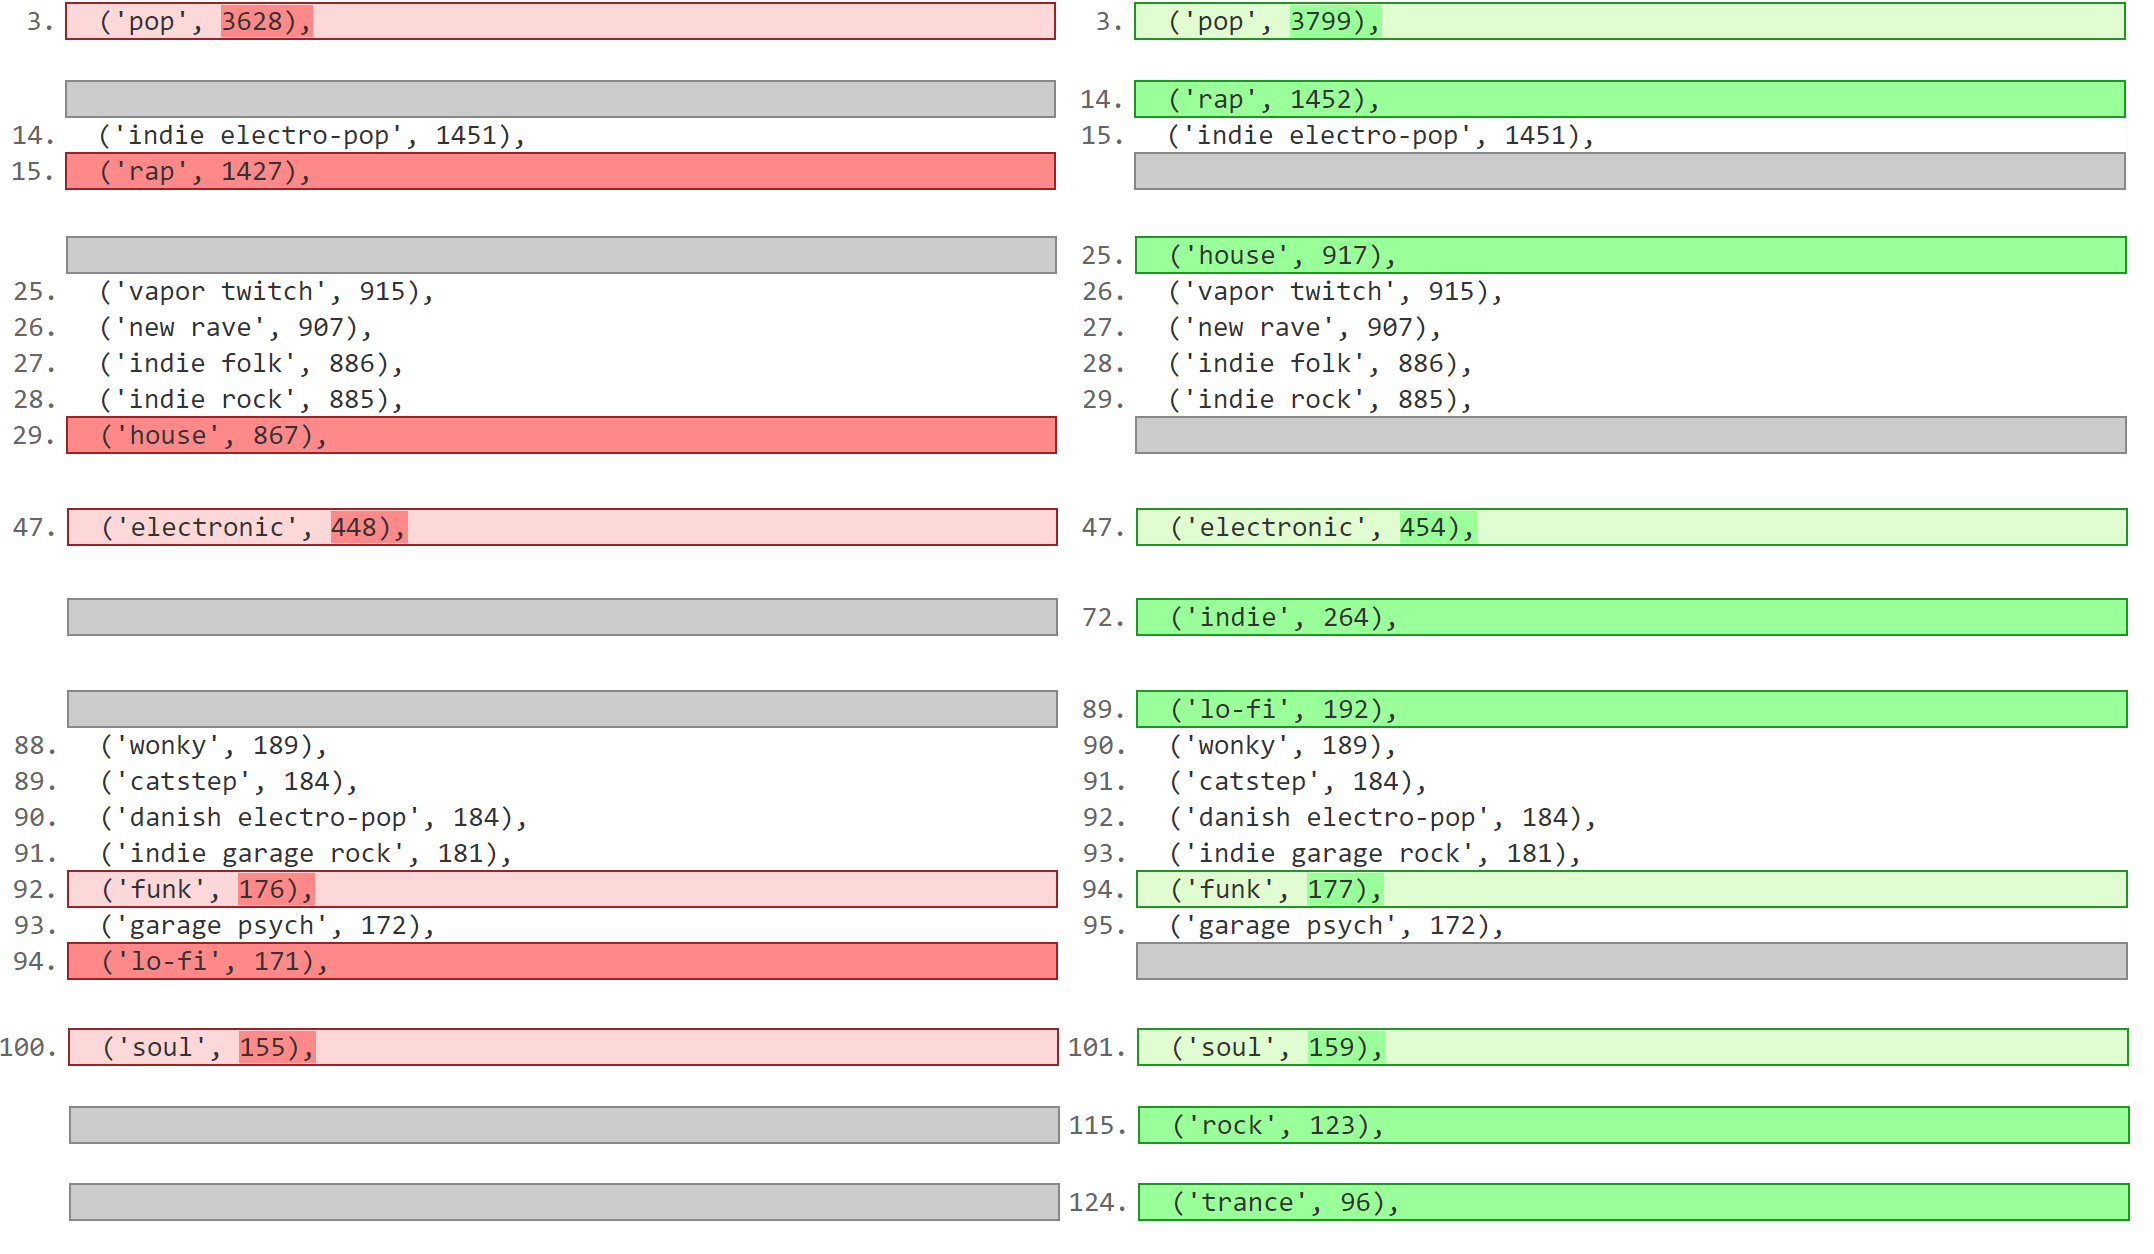

In [10]:
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True     19871
False     5289
dtype: int64

Recovered **558** samples doing this.

In [11]:
genreless_df = reviews_5yrs_df.loc[genre_present == False]
genreless_df.spotify_genres.value_counts()

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/algorithms.py:761: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  keys, counts = f(values, dropna)


[vogue]                            15
[neo-singer-songwriter]            15
[fake]                             12
[electrofox]                       12
[filthstep]                        11
[dreamo]                           10
[mashup]                            6
[covertrance]                       6
[chillhop]                          6
[tracestep]                         4
[j-rap]                             3
[disco]                             3
[indiecoustica]                     2
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]                                  1
[]          

A lot of genre lists are actually **empty** (_duh, forgot that was possible_)!

In [12]:
flat_genreless = [genre for ndarray in list(genreless_df.spotify_genres) for genre in list(ndarray)]
c2 = Counter(flat_genreless)
len(c2), c2.most_common()

(151,
 [('hop', 27),
  ('canadian', 18),
  ('hip', 18),
  ('jazz', 16),
  ('tunes', 15),
  ('movie', 15),
  ('movie tunes', 15),
  ('neo-singer-songwriter', 15),
  ('vogue', 15),
  ('deep', 14),
  ('canadian folk', 13),
  ('folk', 13),
  ('classical', 12),
  ('fake', 12),
  ('electrofox', 12),
  ('band', 11),
  ('filthstep', 11),
  ('dreamo', 10),
  ('era', 10),
  ('roots reggae', 10),
  ('roots', 10),
  ('reggae', 10),
  ('vocal jazz', 9),
  ('vocal', 9),
  ('glitch hop', 9),
  ('glitch', 9),
  ('new', 8),
  ('disco', 8),
  ('destroy techno', 7),
  ('techno', 7),
  ('destroy', 7),
  ('wind', 7),
  ('marching', 7),
  ('wind ensemble', 7),
  ('concert band', 7),
  ('marching band', 7),
  ('concert', 7),
  ('ensemble', 7),
  ('norwegian jazz', 6),
  ('norwegian', 6),
  ('chillhop', 6),
  ('mashup', 6),
  ('covertrance', 6),
  ('deep new americana', 5),
  ('americana', 5),
  ('big', 5),
  ('minimal', 5),
  ('minimal wave', 5),
  ('wave', 5),
  ('grave', 5),
  ('grave wave', 5),
  ('brazil

No other 1gram genres come close to 90 samples.

## Add significant n-gram genres to still-genreless samples

In [13]:
genreless_df.loc[genreless_df.apply(lambda x: pd.Series(x.spotify_genres).isin(['canadian']).any(), axis=1) == True, 'spotify_genres']

119      [canadian indigenous, indigenous, canadian]
7102                 [canadian folk, canadian, folk]
7103                 [canadian folk, canadian, folk]
7104                 [canadian folk, canadian, folk]
7105                 [canadian folk, canadian, folk]
9055                 [canadian folk, canadian, folk]
9056                 [canadian folk, canadian, folk]
9057                 [canadian folk, canadian, folk]
9058                 [canadian folk, canadian, folk]
16398                [canadian folk, canadian, folk]
16510         [canadian hip hop, hip, canadian, hop]
16511         [canadian hip hop, hip, canadian, hop]
16512         [canadian hip hop, hip, canadian, hop]
16513         [canadian hip hop, hip, canadian, hop]
19553                [canadian folk, canadian, folk]
19554                [canadian folk, canadian, folk]
19555                [canadian folk, canadian, folk]
19556                [canadian folk, canadian, folk]
Name: spotify_genres, dtype: object

Let's special case the 2-gram 'hip hop'

In [14]:
freq_genres.get('hip hop')

1212

In [15]:
def addHipHop(genres):
    if 'hip' in genres and 'hop' in genres:
        return np.array(np.append(genres, ['hip hop']))
    return genres

reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'] = reviews_5yrs_df.loc[genre_present == False, 'spotify_genres'].apply(addHipHop)
reviews_5yrs_df.loc[genre_present == False].spotify_genres

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


15                                                     []
16                                                     []
22                                                     []
47                                                     []
48                                                     []
49                                                     []
50                                                     []
51                                                     []
52                                                     []
53                                                     []
64                                                     []
65                                                     []
68                                                     []
69                                                     []
70                                                     []
78                                                     []
79                                                     []
80            

In [16]:
c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
freq_genres.most_common()

[('vapor soul', 4344),
 ('indie poptimism', 3886),
 ('pop', 3799),
 ('indietronica', 3462),
 ('electropop', 3406),
 ('indie r&b', 3242),
 ('tropical house', 2359),
 ('modern rock', 2171),
 ('indie psych-rock', 1942),
 ('indie pop', 1845),
 ('shimmer pop', 1827),
 ('edm', 1826),
 ('chillwave', 1705),
 ('rap', 1452),
 ('indie electro-pop', 1451),
 ('alternative dance', 1418),
 ('metropopolis', 1303),
 ('hip hop', 1230),
 ('pop rap', 1174),
 ('nu disco', 1086),
 ('dance pop', 1054),
 ('chamber pop', 996),
 ('aussietronica', 973),
 ('art pop', 973),
 ('house', 917),
 ('vapor twitch', 915),
 ('new rave', 907),
 ('indie folk', 886),
 ('indie rock', 885),
 ('vapor pop', 808),
 ('electro house', 752),
 ('indie anthem-folk', 649),
 ('gauze pop', 647),
 ('escape room', 641),
 ('post-teen pop', 606),
 ('folk-pop', 586),
 ('deep australian indie', 572),
 ('electronic trap', 570),
 ('southern hip hop', 544),
 ('trap music', 544),
 ('neo-psychedelic', 503),
 ('big room', 498),
 ('underground hip hop

`('hip hop', 1212)` => `('hip hop', 1230)`

In [17]:
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True     19889
False     5271
dtype: int64

**18** more samples recovered with generic genre `hip hop`.

## Remove samples that still don't have a top genre

Remove the remaining genreless samples (including empty ones that Spotify didn't have genre info for).

In [18]:
genreless_df = reviews_5yrs_df.loc[genre_present == False]

final_genreless = [genre for ndarray in list(genreless_df.spotify_genres) for genre in list(ndarray)]
c3 = Counter(final_genreless)
len(c3), c3.most_common()

(135,
 [('jazz', 16),
  ('tunes', 15),
  ('movie', 15),
  ('movie tunes', 15),
  ('neo-singer-songwriter', 15),
  ('vogue', 15),
  ('canadian', 14),
  ('canadian folk', 13),
  ('folk', 13),
  ('deep', 12),
  ('classical', 12),
  ('fake', 12),
  ('electrofox', 12),
  ('band', 11),
  ('filthstep', 11),
  ('dreamo', 10),
  ('era', 10),
  ('roots reggae', 10),
  ('roots', 10),
  ('reggae', 10),
  ('vocal jazz', 9),
  ('vocal', 9),
  ('glitch hop', 9),
  ('glitch', 9),
  ('hop', 9),
  ('new', 8),
  ('disco', 8),
  ('destroy techno', 7),
  ('techno', 7),
  ('destroy', 7),
  ('wind', 7),
  ('marching', 7),
  ('wind ensemble', 7),
  ('concert band', 7),
  ('marching band', 7),
  ('concert', 7),
  ('ensemble', 7),
  ('norwegian jazz', 6),
  ('norwegian', 6),
  ('chillhop', 6),
  ('mashup', 6),
  ('covertrance', 6),
  ('deep new americana', 5),
  ('americana', 5),
  ('big', 5),
  ('minimal', 5),
  ('minimal wave', 5),
  ('wave', 5),
  ('grave', 5),
  ('grave wave', 5),
  ('classical era', 5),
  

In [19]:
c1.get('jazz')

28

In [20]:
len(genreless_df.spotify_genres.loc[genreless_df.spotify_genres.apply(lambda x: len(x) == 0)])

5030

Removing **5030** empty-genre samples and **241** genreless samples.

In [21]:
reviews_5yrs_df = reviews_5yrs_df.drop(genreless_df.index)
reviews_5yrs_df.head()

,artist,artist_id,author,content,date_published,dek,desc,direction,domain,error,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,None,New Music\nMt. Joy reached out to us with the ...,2017-11-20T13:33:10.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.buffablog.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.178,144.458,199827.0,4.0
1,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Martin,Folk rockers Mt. Joy have debuted their new so...,2017-11-16T00:00:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.discobelle.net,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.178,144.458,199827.0,4.0
2,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Nasko,You know we're digging Mt. Joy.\nTheir new sin...,2017-11-14T14:30:26.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.stereofox.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.178,144.458,199827.0,4.0
3,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,D & d,"Nothing against the profession, but the U.S. h...",2018-06-20T10:53:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,indieobsessive.blogspot.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.178,144.458,199827.0,4.0
4,Opia,70zHrrrPfBkVV44AEhFyyh,Nat Morawski,Connecticut duo Opia have released a guitar he...,2018-05-24T00:00:00.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,acidstag.com,NaN,...,-6.575,1.0,0.1020,0.190000,0.000034,0.0625,0.582,87.974,223814.0,4.0


In [22]:
c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})
genre_present = reviews_5yrs_df.apply(lambda x: pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys()))).any(), axis=1)
genre_present.value_counts()

True    19889
dtype: int64

In [23]:
list(zip(range(1, len(freq_genres) + 1), freq_genres.most_common()))

[(1, ('vapor soul', 4344)),
 (2, ('indie poptimism', 3886)),
 (3, ('pop', 3799)),
 (4, ('indietronica', 3462)),
 (5, ('electropop', 3406)),
 (6, ('indie r&b', 3242)),
 (7, ('tropical house', 2359)),
 (8, ('modern rock', 2171)),
 (9, ('indie psych-rock', 1942)),
 (10, ('indie pop', 1845)),
 (11, ('shimmer pop', 1827)),
 (12, ('edm', 1826)),
 (13, ('chillwave', 1705)),
 (14, ('rap', 1452)),
 (15, ('indie electro-pop', 1451)),
 (16, ('alternative dance', 1418)),
 (17, ('metropopolis', 1303)),
 (18, ('hip hop', 1230)),
 (19, ('pop rap', 1174)),
 (20, ('nu disco', 1086)),
 (21, ('dance pop', 1054)),
 (22, ('chamber pop', 996)),
 (23, ('aussietronica', 973)),
 (24, ('art pop', 973)),
 (25, ('house', 917)),
 (26, ('vapor twitch', 915)),
 (27, ('new rave', 907)),
 (28, ('indie folk', 886)),
 (29, ('indie rock', 885)),
 (30, ('vapor pop', 808)),
 (31, ('electro house', 752)),
 (32, ('indie anthem-folk', 649)),
 (33, ('gauze pop', 647)),
 (34, ('escape room', 641)),
 (35, ('post-teen pop', 606))

## Count frequent genres per sample
Since samples can have multiple genres, let's see how often this occurs with the 'top' genres.

First, let's remove all non-top genres.

In [24]:
# scratchpad
np.array(pd.Series(reviews_5yrs_df.spotify_genres[0])), np.array(pd.Series(reviews_5yrs_df.spotify_genres[0]).where(pd.Series(reviews_5yrs_df.spotify_genres[0]).isin(np.array(list(freq_genres.keys())))).dropna())

(array(['deep new americana', 'folk-pop', 'indie pop', 'modern rock',
        'new americana', 'stomp and holler'], dtype=object),
 array(['folk-pop', 'indie pop', 'modern rock', 'new americana',
        'stomp and holler'], dtype=object))

In [25]:
reviews_5yrs_df.spotify_genres = reviews_5yrs_df.apply(lambda x: np.array(pd.Series(x.spotify_genres).where(pd.Series(x.spotify_genres).isin(np.array(list(freq_genres.keys())))).dropna()), axis=1)

Now we can simply get genre counts per row in `spotify_genres`

In [26]:
num_genres_per = reviews_5yrs_df.spotify_genres.apply(len)
list(zip(range(1, len(num_genres_per.value_counts()) + 1), num_genres_per.value_counts(), num_genres_per.value_counts() / sum(num_genres_per.value_counts())))

[(1, 4479, 0.2251998592186636),
 (2, 2769, 0.13922268590678263),
 (3, 2629, 0.1321836190859269),
 (4, 2617, 0.13158027050128213),
 (5, 2199, 0.11056362813615567),
 (6, 1695, 0.08522298758107497),
 (7, 1139, 0.05726783649253356),
 (8, 849, 0.04268691236361808),
 (9, 457, 0.022977525265221982),
 (10, 331, 0.016642365126451807),
 (11, 187, 0.009402182110714466),
 (12, 174, 0.008748554477349289),
 (13, 128, 0.006435718236210971),
 (14, 80, 0.004022323897631856),
 (15, 45, 0.0022625571924179194),
 (16, 31, 0.0015586505103323445),
 (17, 27, 0.0013575343154507518),
 (18, 24, 0.001206697169289557),
 (19, 18, 0.0009050228769671677),
 (20, 10, 0.000502790487203982),
 (21, 1, 5.027904872039821e-05)]

In [27]:
reviews_5yrs_df.loc[reviews_5yrs_df.spotify_genres.apply(lambda x: len(x) == 21)][['artist', 'song_title', 'spotify_genres']]

,artist,song_title,spotify_genres
1160,Destroyer,Tinseltown Swimming In Blood,"[alternative dance, alternative rock, art pop,..."


In [28]:
list(reviews_5yrs_df.loc[reviews_5yrs_df.spotify_genres.apply(lambda x: len(x) == 21), 'spotify_genres'])

[array(['alternative dance', 'alternative rock', 'art pop', 'chamber pop',
        'chamber psych', 'chillwave', 'dream pop', 'folk-pop',
        'freak folk', 'garage psych', 'indie folk', 'indie pop',
        'indie rock', 'indietronica', 'lo-fi', 'modern rock',
        'neo-psychedelic', 'noise pop', 'nu gaze', 'preverb',
        'stomp and holler'], dtype=object)]

Might try capping # of frequent genres per sample at **top 10** when conditioning.

In [29]:
cap = 10

sum(num_genres_per.value_counts()[:cap] / sum(num_genres_per.value_counts()))

0.9635476896777114

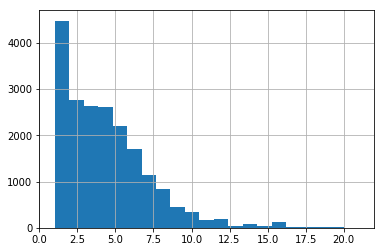

In [30]:
% matplotlib inline

num_genres_per.hist(bins=len(num_genres_per.value_counts()))

In [31]:
'unique combinations of genres:', len(Counter([tuple(set(ndarray)) for ndarray in reviews_5yrs_df.spotify_genres]))

('unique combinations of genres:', 1135)

## New quilt revision (3)

In [32]:
deephypebot._set(['reviews_and_metadata_5yrs'], reviews_5yrs_df)
deephypebot.reviews_and_metadata_5yrs()

,artist,artist_id,author,content,date_published,dek,desc,direction,domain,error,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,None,New Music\nMt. Joy reached out to us with the ...,2017-11-20T13:33:10.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.buffablog.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
1,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Martin,Folk rockers Mt. Joy have debuted their new so...,2017-11-16T00:00:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.discobelle.net,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
2,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,Nasko,You know we're digging Mt. Joy.\nTheir new sin...,2017-11-14T14:30:26.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,www.stereofox.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
3,Mt. Joy,69tiO1fG8VWduDl3ji2qhI,D & d,"Nothing against the profession, but the U.S. h...",2018-06-20T10:53:00.000Z,NaN,“Silver Lining” is the fourth released single ...,ltr,indieobsessive.blogspot.com,NaN,...,-6.231,1.0,0.0323,0.000921,0.000000,0.0780,0.1780,144.458,199827.0,4.0
4,Opia,70zHrrrPfBkVV44AEhFyyh,Nat Morawski,Connecticut duo Opia have released a guitar he...,2018-05-24T00:00:00.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,acidstag.com,NaN,...,-6.575,1.0,0.1020,0.190000,0.000034,0.0625,0.5820,87.974,223814.0,4.0
5,Opia,70zHrrrPfBkVV44AEhFyyh,Adeel Amini,Now this is inventive. Not that we'd expect an...,2018-05-17T11:30:22.000Z,NaN,\n\nI don’t know why but this feels like a bre...,ltr,pressplayok.com,NaN,...,-6.575,1.0,0.1020,0.190000,0.000034,0.0625,0.5820,87.974,223814.0,4.0
6,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,Oblivious Pop,Since the very first release from Elohim about...,2018-06-20T16:01:00.000Z,NaN,\n\n?\n\n,ltr,www.obliviouspop.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
7,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,New Music\nNow this is how you get a party sta...,2018-05-09T22:44:56.000Z,NaN,\n\n?\n\n,ltr,www.buffablog.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
8,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,"This Friday, April 27th, ELOHIM releases her l...",None,NaN,\n\n?\n\n,ltr,www.theautumnroses.com,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0
9,ELOHIM,6wKxOKEA3K6R2UZ3COLXEY,None,What a long way Elohim has come since the rele...,2018-04-24T17:12:03.000Z,NaN,\n\n?\n\n,ltr,www.highclouds.org,NaN,...,-6.560,1.0,0.0347,0.139000,0.000003,0.1110,0.2990,120.046,225531.0,4.0


In [33]:
deephypebot._meta['description'] = 'All reviews contain 1+ "top" genres'

In [34]:
quilt.build(pkg_name, deephypebot) # revision3
quilt.inspect(pkg_name)

/home/ubuntu/.local/share/QuiltCli/quilt_packages/pkgs/Quilt/iconix/deephypebot
└── reviews_and_metadata_5yrs: shape (19889, 45), types 'artist': object, 'artist_id': object, 'author': object, 'conte…


In [35]:
quilt.login()
quilt.push(pkg_name, is_public=True)

Launching a web browser...
If that didn't work, please visit the following URL: https://pkg.quiltdata.com/login
Failed to launch the browser: Command '['xdg-open', 'https://pkg.quiltdata.com/login']' returned non-zero exit status 3.

Enter the code from the webpage: eyJjb2RlIjogIjg3MTM3MzZkLTgwNDAtNGEyNi05OTUyLTc5MTRmYjg2NTNmOCIsICJpZCI6ICJkMzI3ZTdkYS1lZDFiLTRiMWMtYTFlMC1lM2ZkNzk4NDJlMzkifQ==
Fetching upload URLs from the registry...


  0%|          | 0.00/29.1M [00:00<?, ?B/s]

Uploading 2 fragments (29078344 bytes)...


100%|██████████| 29.1M/29.1M [00:03<00:00, 9.31MB/s]  


Uploading package metadata...
Updating the 'latest' tag...
Push complete. iconix/deephypebot is live:
https://quiltdata.com/package/iconix/deephypebot


## Genre wordcloud

In [1]:
import quilt
pkg_name = 'iconix/deephypebot'

quilt.install(pkg_name)

iconix/deephypebot already installed.
Overwrite? (y/n) y
Fragments already downloaded


In [2]:
from quilt.data.iconix import deephypebot

reviews_5yrs_df = deephypebot.reviews_and_metadata_5yrs()
reviews_5yrs_df.sample(frac=1).head()

,artist,artist_id,author,content,date_published,dek,desc,direction,domain,error,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
10016,Atlas Genius,42vg2T0Xg9yPaAgogJzoQH,ITJYM,It's been an absolute age since we've heard an...,2015-06-30T00:00:00.000Z,NaN,\n\n“Molecules” is the lead single from Atlas ...,ltr,inthejunkyardmusic.co.uk,NaN,...,-4.822,0.0,0.0440,0.000442,0.000010,0.1950,0.513,117.028,249267.0,4.0
14296,MEG MAC,4faUajx9k93O56nlmpkOuz,None,"I posted Meg Mac a while back, and it was quit...",None,NaN,\n\n?\n\n,ltr,musicthatwelike.com,NaN,...,-8.176,0.0,0.0483,0.079600,0.000023,0.0414,0.371,80.118,193405.0,4.0
16588,DYLYN,3hOdLrtKdSs3AEuwcR7ses,Laurence\nDay,DYLYN deals in big statements: cascading beats...,None,NaN,\n\n?\n\n,ltr,None,NaN,...,-3.677,0.0,0.0452,0.054500,0.000007,0.0766,0.905,154.964,187320.0,4.0
9729,Major Lazer,738wLrAtLtCtFOLvQBXOXp,theneedledrop,"July 22, 2015New MusictheneedledropComment\nMa...",None,NaN,"\n\nMajor Lazer strikes back with “Lost,” a Re...",ltr,www.theneedledrop.com,NaN,...,-5.061,1.0,0.0286,0.005600,0.002120,0.0875,0.847,139.928,195649.0,4.0
4419,FUTURO PELO,5EqHv5lvGgrnkuGEFn67yN,Ivo,Electronic\nIt's so difficult to describe Futu...,2017-02-23T14:09:18.000Z,NaN,\n\n,ltr,www.stereofox.com,NaN,...,-7.852,0.0,0.0560,0.020700,0.137000,0.0984,0.860,142.057,170704.0,4.0


In [3]:
from collections import Counter

freq_threshold = 90

c1 = Counter([g for gg in reviews_5yrs_df.spotify_genres for g in gg])
freq_genres = Counter({k:v for (k,v) in c1.items() if v >= freq_threshold})

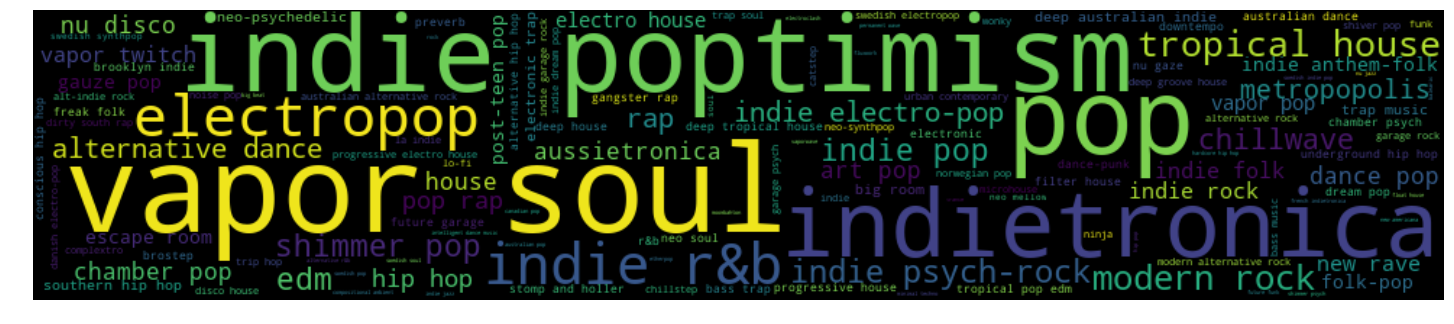

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

wordcloud = WordCloud(width=975).generate_from_frequencies(dict(freq_genres))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('genrecloud.png', bbox_inches='tight', facecolor='k')

# Split content into sentences
For VAE training

In [1]:
from quilt.data.iconix import deephypebot
import spacy

import time
start = time.time()

nlp = spacy.load('en')

df = deephypebot.reviews_and_metadata_5yrs()
df = df.assign(content_sentences=lambda x: [[' '.join(s.text.split()) for s in ss] for ss in [list(nlp(c).sents) for c in x.masked_content]])
    
print(f'Runtime: {time.time() - start:.2f}s')

df.content_sentences.head()

Runtime: 571.64s


0    [New Music <artist> reached out to us with the...
1    [Folk rockers <artist> have debuted their new ...
2    [You know we're digging <, artist>., Their new...
3    [Nothing against the profession, but the U.S. ...
4    [Connecticut duo <artist> have released a guit...
Name: content_sentences, dtype: object

## New quilt revision (4)

In [2]:
import quilt
pkg_name = 'iconix/deephypebot'

deephypebot._set(['reviews_and_metadata_5yrs'], df)
deephypebot.reviews_and_metadata_5yrs().content_sentences.head()

0    [New Music <artist> reached out to us with the...
1    [Folk rockers <artist> have debuted their new ...
2    [You know we're digging <, artist>., Their new...
3    [Nothing against the profession, but the U.S. ...
4    [Connecticut duo <artist> have released a guit...
Name: content_sentences, dtype: object

In [3]:
deephypebot._meta['description'] = 'Split content into sentences'

In [4]:
quilt.build(pkg_name, deephypebot) # revision4
quilt.inspect(pkg_name)

/home/ubuntu/.local/share/QuiltCli/quilt_packages/pkgs/Quilt/iconix/deephypebot
└── reviews_and_metadata_5yrs: shape (19889, 46), types 'artist': object, 'artist_id': object, 'author': object, 'conte…


In [5]:
quilt.login()
quilt.push(pkg_name, is_public=True)

Launching a web browser...
If that didn't work, please visit the following URL: https://pkg.quiltdata.com/login
Failed to launch the browser: Command '['xdg-open', 'https://pkg.quiltdata.com/login']' returned non-zero exit status 3.

Enter the code from the webpage: eyJjb2RlIjogIjBhMmM2N2RhLTgwN2UtNDE3MC04YTUyLTFmYWZiZjljNzBiYyIsICJpZCI6ICJkMzI3ZTdkYS1lZDFiLTRiMWMtYTFlMC1lM2ZkNzk4NDJlMzkifQ==
Fetching upload URLs from the registry...


  0%|          | 0.00/40.1M [00:00<?, ?B/s]

Uploading 2 fragments (40111029 bytes)...


100%|██████████| 40.1M/40.1M [00:03<00:00, 12.6MB/s]  


Uploading package metadata...
Updating the 'latest' tag...
Push complete. iconix/deephypebot is live:
https://quiltdata.com/package/iconix/deephypebot


In [ ]:
#df.to_json('../datasets/reviews_and_metadata_5yrs.json', orient='records')

# Pre-trained VAE model v1
## New quilt revision (5)

In [1]:
from quilt.data.iconix import deephypebot
import quilt

pkg_name = 'iconix/deephypebot'

quilt.inspect(pkg_name)

/home/ubuntu/.local/share/QuiltCli/quilt_packages/pkgs/Quilt/iconix/deephypebot
└── reviews_and_metadata_5yrs: shape (19889, 46), types 'artist': object, 'artist_id': object, 'author': object, 'conte…


In [2]:
import dill as pickle

cache_file = '../../pytorch-text-vae/tmp/reviews_and_metadata_5yrs_stored_info.pkl'

with open(cache_file, "rb", buffering=0) as f:
    input_side, output_side, pairs, dataset, Z_SIZE, CONDITION_SIZE, DECODER_HIDDEN_SIZE, ENCODER_HIDDEN_SIZE, N_ENCODER_LAYERS = pickle.load(f)
    
pairs[0]

('ultimatum is out now and it features malian musician and singer songwriter fatoumata diawara',
 'arawaid atamuotaf retirwgnos regnis dna naicisum nailam serutaef ti dna won tuo si mutamitlu',
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [9]:
with open(cache_file, "rb", buffering=0) as f:
    bytearray(f)

TypeError: an integer is required

In [4]:
with open(cache_file, "rb", buffering=0) as f:
    deephypebot._set(['reviews_and_metadata_5yrs_stored_info'], bytes(f))
deephypebot.reviews_and_metadata_5yrs_stored_info()

TypeError: 'bytes' object cannot be interpreted as an integer

In [6]:
import dill as pickle

input_side, output_side, pairs, dataset, Z_SIZE, CONDITION_SIZE, DECODER_HIDDEN_SIZE, ENCODER_HIDDEN_SIZE, N_ENCODER_LAYERS = pickle.load(deephypebot.reviews_and_metadata_5yrs_stored_info())

pairs[0]

TypeError: file must have 'read' and 'readline' attributes

# Non-Quilt exploration

## Topic modeling

In [1]:
import os
import pandas as pd

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '..', 'datasets')
reviews_f = 'reviews_and_metadata'

reviews_5yrs_f = os.path.join(DATA_DIR, f'{reviews_f}_5yrs.json')
reviews_5yrs_df = pd.read_json(reviews_5yrs_f)
print(f'num_reviews: {len(reviews_5yrs_df)}')
reviews_5yrs_df.content_sentences.head()

num_reviews: 19889


0    [New Music <artist> reached out to us with the...
1    [Folk rockers <artist> have debuted their new ...
2    [You know we're digging <, artist>., Their new...
3    [Nothing against the profession, but the U.S. ...
4    [Connecticut duo <artist> have released a guit...
Name: content_sentences, dtype: object

In [1]:
import torch

# pip install git+https://github.com/iconix/pytorch-text-vae.git
from pytorchtextvae import generate

DEVICE = torch.device('cpu') # CPU inference

# workaround for un-pickling after module directory change https://stackoverflow.com/a/45264751
#import sys
#sys.path.append('../../pytorch-text-vae/pytorchtextvae')

vae, input_side, output_side, pairs, dataset, EMBED_SIZE, random_state = generate.load_model('../../pytorch-text-vae/model/best/reviews_and_metadata_5yrs_state.pt', 'reviews_and_metadata_5yrs_stored_info.pkl', DEVICE, cache_path='../../pytorch-text-vae/model/best/tmp')

Fetching cached info at ../../pytorch-text-vae/model/best/tmp/reviews_and_metadata_5yrs_stored_info.pkl
Cache ../../pytorch-text-vae/model/best/tmp/reviews_and_metadata_5yrs_stored_info.pkl loaded (load time: 0.67s)
Found saved model ../../pytorch-text-vae/model/best/reviews_and_metadata_5yrs_state.pt
MAX_SAMPLE: False; TRUNCATED_SAMPLE: True
Trained for 360000 steps (load time: 19.51s)
Setting new random seed


In [2]:
from pytorchtextvae import datasets

def tokenize(line):
    l = line.strip().lstrip().rstrip()
    l = datasets.normalize_string(l)
    return l.split(' ')

In [3]:
#sents = [sentence for review in reviews_5yrs_df.content_sentences for sentence in review]
sents = [pair[0] for pair in pairs]
texts = [tokenize(sentence) for sentence in sents]
texts[:3]

[['hopefully',
  'that',
  'wont',
  'be',
  'the',
  'case',
  'for',
  'chicago',
  'based',
  'producer',
  'trademark',
  'and',
  'his',
  'newest',
  'release',
  'called',
  'take',
  'it',
  'back',
  'combining'],
 ['say',
  'hello',
  'to',
  'the',
  'very',
  'excellent',
  'blonde',
  'remix',
  'of',
  'artist',
  's',
  'sunlight',
  'which',
  'will',
  'indeed',
  'fill',
  'you',
  'up',
  'with',
  'light',
  'from',
  'the',
  'sun'],
 ['my',
  'teething',
  'ring',
  'was',
  'numbed',
  'by',
  'the',
  'nonsense',
  'push',
  'makes',
  'it',
  'known',
  'that',
  'hes',
  'been',
  'a',
  'hustler',
  'from',
  'almost',
  'jump',
  'in',
  'a',
  'sixteen',
  'that',
  'tempers',
  'a',
  'glamorizing',
  'look',
  'at',
  'his',
  'black',
  'ferris',
  'bueller',
  'teen',
  'slinging',
  'days',
  'nia',
  'i',
  'was',
  'crack',
  'in',
  'the',
  'school',
  'zone',
  'two',
  'beepers',
  'on',
  'me']]

In [5]:
from nltk.corpus import stopwords

# remove stop words and words that appear only once
stoplist = [datasets.normalize_string(word) for word in stopwords.words('english')]
fillerlist = ['author', 'song_title', 'artist', 'sitename']

texts = [[word for word in text if word not in stoplist and word not in fillerlist] for text in texts]
texts[:3]

[['hopefully',
  'case',
  'chicago',
  'based',
  'producer',
  'trademark',
  'newest',
  'release',
  'called',
  'take',
  'back',
  'combining'],
 ['say',
  'hello',
  'excellent',
  'blonde',
  'remix',
  'sunlight',
  'indeed',
  'fill',
  'light',
  'sun'],
 ['teething',
  'ring',
  'numbed',
  'nonsense',
  'push',
  'makes',
  'known',
  'hes',
  'hustler',
  'almost',
  'jump',
  'sixteen',
  'tempers',
  'glamorizing',
  'look',
  'black',
  'ferris',
  'bueller',
  'teen',
  'slinging',
  'days',
  'nia',
  'crack',
  'school',
  'zone',
  'two',
  'beepers']]

In [6]:
from gensim.corpora.dictionary import Dictionary

'''# remove stop words and words that appear only once
stoplist = list(stopwords.words('english'))
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist
    if stopword in dictionary.token2id]
filler_ids = [dictionary.token2id[fillword] for fillword in ['author', 'song_title', 'artist', 'sitename']
    if fillword in dictionary.token2id]

dictionary.filter_tokens(stop_ids + filler_ids)  # remove stop words
dictionary.compactify()  # remove gaps in id sequence after words that were removed'''

dictionary = Dictionary(texts)

In [15]:
from gensim.models.ldamodel import LdaModel

n_topics = 5
passes = 20 # number of passes through documents
iterations = 400
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

corpus = [dictionary.doc2bow(text) for text in texts]
# Train the model on the corpus.
#lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics, iterations=iterations, passes=passes, eval_every=eval_every)
lda = LdaModel(corpus, id2word=dictionary, num_topics=n_topics)
lda.print_topics(n_topics)

[(0,
  '0.007*"music" + 0.005*"hop" + 0.005*"hip" + 0.004*"remix" + 0.004*"like" + 0.004*"pop" + 0.004*"de" + 0.003*"thought" + 0.003*"story" + 0.003*"ca"'),
 (1,
  '0.016*"one" + 0.014*"like" + 0.013*"song" + 0.009*"music" + 0.009*"time" + 0.007*"track" + 0.007*"love" + 0.006*"get" + 0.006*"something" + 0.006*"really"'),
 (2,
  '0.018*"track" + 0.015*"vocals" + 0.013*"pop" + 0.007*"sound" + 0.006*"vocal" + 0.006*"house" + 0.006*"beat" + 0.006*"production" + 0.006*"electronic" + 0.005*"like"'),
 (3,
  '0.009*"remix" + 0.009*"tour" + 0.008*"soundcloud" + 0.008*"check" + 0.007*"music" + 0.006*"facebook" + 0.006*"free" + 0.005*"listen" + 0.005*"twitter" + 0.005*"live"'),
 (4,
  '0.034*"new" + 0.023*"album" + 0.022*"single" + 0.016*"release" + 0.016*"ep" + 0.016*"track" + 0.013*"debut" + 0.012*"first" + 0.012*"released" + 0.011*"year"')]

In [16]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [17]:
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.110422 -0.059163       1        1  27.744017
4      0.070284 -0.228004       2        1  23.130421
2     -0.217169 -0.027113       3        1  22.774630
3      0.287699  0.041358       4        1  14.560752
0     -0.030392  0.272923       5        1  11.790182, topic_info=      Category          Freq          Term         Total  loglift  logprob
term                                                                      
140    Default   6843.000000         album   6843.000000  30.0000  30.0000
59     Default   6961.000000        single   6961.000000  29.0000  29.0000
111    Default  12702.000000           new  12702.000000  28.0000  28.0000
9      Default   4969.000000       release   4969.000000  27.0000  27.0000
82     Default   4788.000000            ep   4788.000000  26.0000  26.0000
109    Default   4635.000000        vocals   4635.000000  25.0000  25.0000
272    Default   3928.000000         debut   3928.000000  24.0000  24.0000
74     Default   3531.000000      released   3531.000000  23.0000  23.0000
310    Default   3969.000000          year   3969.000000  22.0000  22.0000
67     Default   4911.000000         first   4911.000000  21.0000  21.0000
85     Default   5153.000000           pop   5153.000000  20.0000  20.0000
177    Default   7379.000000           one   7379.000000  19.0000  19.0000
8      Default   3076.000000      producer   3076.000000  18.0000  18.0000
107    Default  12824.000000         track  12824.000000  17.0000  17.0000
329    Default   1874.000000          tour   1874.000000  16.0000  16.0000
302    Default   3023.000000          last   3023.000000  15.0000  15.0000
93     Default   1678.000000    soundcloud   1678.000000  14.0000  14.0000
1      Default   2322.000000         based   2322.000000  13.0000  13.0000
174    Default   7776.000000          like   7776.000000  12.0000  12.0000
423    Default   1478.000000         check   1478.000000  11.0000  11.0000
430    Default   1874.000000         vocal   1874.000000  10.0000  10.0000
647    Default   4207.000000          time   4207.000000   9.0000   9.0000
308    Default   2299.000000           via   2299.000000   8.0000   8.0000
92     Default   1168.000000      facebook   1168.000000   7.0000   7.0000
607    Default   1592.000000        guitar   1592.000000   6.0000   6.0000
1686   Default   1500.000000          bass   1500.000000   5.0000   5.0000
159    Default   2134.000000        really   2134.000000   4.0000   4.0000
413    Default   1882.000000            im   1882.000000   3.0000   3.0000
2      Default   1650.000000        called   1650.000000   2.0000   2.0000
457    Default   2682.000000        latest   2682.000000   1.0000   1.0000
...        ...           ...           ...           ...      ...      ...
2097    Topic5    180.425110       section    181.217346   2.1335  -6.7482
5700    Topic5    178.864349        techno    179.666138   2.1334  -6.7569
2972    Topic5    189.313522       outside    190.163803   2.1334  -6.7001
4510    Topic5    208.031723         roots    208.971741   2.1334  -6.6058
4803    Topic5    169.950760         david    170.733200   2.1333  -6.8080
4815    Topic5    167.935455          land    168.721680   2.1332  -6.8199
2081    Topic5    458.724640         story    462.712952   2.1292  -5.8151
400     Topic5    285.599762         banks    286.997803   2.1330  -6.2889
407     Topic5    465.894470       thought    471.543365   2.1259  -5.7996
4317    Topic5    254.351883         tuned    256.012604   2.1314  -6.4048
35997   Topic5    267.616882            dy    269.563324   2.1307  -6.3540
757     Topic5    223.799896         apple    225.288437   2.1313  -6.5328
1163    Topic5    281.756805             n    286.157440   2.1224  -6.3025
4337    Topic5    417.940369      american    433.936371   2.1003  -5.9082
2720    Topic5    275.599701     interview    283.7121

Let's look at a few sentences and their topics...

In [18]:
from operator import itemgetter

for i in range(10):
    print(max(lda[corpus[i]],key=itemgetter(1)), datasets.normalize_string(sents[i]))

(4, 0.5874822) hopefully that wont be the case for chicago based producer trademark and his newest release called take it back combining
(0, 0.73017025) say hello to the very excellent blonde remix of artist s sunlight which will indeed fill you up with light from the sun
(1, 0.2728787) my teething ring was numbed by the nonsense push makes it known that hes been a hustler from almost jump in a sixteen that tempers a glamorizing look at his black ferris bueller teen slinging days nia i was crack in the school zone two beepers on me
(4, 0.5453808) yet this is where sofi tukker set themselves apart from the crowd dropping an eccentric single that takes the genre to the next level and giving it a similarly unconventional video for the genre
(4, 0.63974065) prins thomas actually thomas hermansen is the head of the label full pupp which released the first todd terje singles
(4, 0.56905663) artist continues to make waves in the pop world with the release of song_title taken from her silent m

In [19]:
from collections import Counter

Counter([max(lda[corpus[i]], key=itemgetter(1))[0] + 1 for i in range(len(texts))])

Counter({5: 25901, 1: 6135, 2: 36855, 4: 11394, 3: 24182})

In [20]:
out = sorted([f'{max(lda[corpus[i]], key=itemgetter(1))[0] + 1} {datasets.normalize_string(sents[i])}\n' for i in range(len(texts))])
with open('pairs_sentence_topics.txt', 'w') as f:
    f.writelines(out)

### POS-based topics

In [12]:
import spacy
nlp = spacy.load('en')

[[token.tag_ for token in nlp(' '.join(text))] for text in texts[:5]]

[['JJ', 'NN', 'VBD', 'PRP', 'JJ', 'NN', 'NN', 'NN', 'NN'],
 ['NN', 'VBG', 'NNS', 'NN', 'VBG', 'NNS', 'NN'],
 ['JJ', 'JJ', 'NN', 'VBG', 'RB', 'VBN'],
 ['RB', 'NN', 'JJ', 'NN'],
 ['NNS', 'NNS', 'NN', 'NN']]

In [14]:
pos_texts = [[token.tag_ for token in nlp(' '.join(text))] for text in texts]
pos_texts[:3]

[['JJ', 'NN', 'VBD', 'PRP', 'JJ', 'NN', 'NN', 'NN', 'NN'],
 ['NN', 'VBG', 'NNS', 'NN', 'VBG', 'NNS', 'NN'],
 ['JJ', 'JJ', 'NN', 'VBG', 'RB', 'VBN']]

In [15]:
pos_dictionary = Dictionary(pos_texts)

pos_corpus = [pos_dictionary.doc2bow(text) for text in pos_texts]
# Train the model on the corpus.
pos_lda = LdaModel(pos_corpus, id2word=pos_dictionary, num_topics=n_topics)
pos_lda.print_topics(n_topics)

[(0,
  '0.402*"LS" + 0.247*"XX" + 0.145*"UH" + 0.089*"CC" + 0.058*"FW" + 0.019*"NN" + 0.017*"ADD" + 0.008*"DT" + 0.006*"AFX" + 0.006*"NFP"'),
 (1,
  '0.291*"NN" + 0.236*"CD" + 0.210*"VB" + 0.058*"PRP" + 0.046*"IN" + 0.042*"MD" + 0.037*"RB" + 0.022*"VBN" + 0.014*"NNS" + 0.011*"NNP"'),
 (2,
  '0.384*"NN" + 0.203*"JJ" + 0.113*"NNS" + 0.069*"RB" + 0.046*"VBG" + 0.045*"VBP" + 0.035*"VBZ" + 0.035*"VBN" + 0.033*"VBD" + 0.021*"IN"')]

In [16]:
pyLDAvis.gensim.prepare(pos_lda, pos_corpus, pos_dictionary)

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.207886 -0.165670       1        1  75.660324
1     -0.212328  0.164507       2        1  18.364195
0      0.420214  0.001163       3        1   5.975476, topic_info=     Category           Freq   Term          Total  loglift  logprob
term                                                                
12    Default   72180.000000     CD   72180.000000  30.0000  30.0000
26    Default   39956.000000     LS   39956.000000  29.0000  29.0000
10    Default   64211.000000     VB   64211.000000  28.0000  28.0000
1     Default  574127.000000     NN  574127.000000  27.0000  27.0000
22    Default   24595.000000     XX   24595.000000  26.0000  26.0000
0     Default  256121.000000     JJ  256121.000000  25.0000  25.0000
14    Default   14379.000000     UH   14379.000000  24.0000  24.0000
2     Default   17823.000000    PRP   17823.000000  23.0000  23.0000
9     Default   39929.000000     IN   39929.000000  22.0000  22.0000
24    Default    8899.000000     CC    8899.000000  21.0000  21.0000
16    Default   12864.000000     MD   12864.000000  20.0000  20.0000
23    Default    5813.000000     FW    5813.000000  19.0000  19.0000
4     Default  146498.000000    NNS  146498.000000  18.0000  18.0000
5     Default   57868.000000    VBG   57868.000000  17.0000  17.0000
6     Default   97701.000000     RB   97701.000000  16.0000  16.0000
7     Default   50508.000000    VBN   50508.000000  15.0000  15.0000
11    Default   44712.000000    VBZ   44712.000000  14.0000  14.0000
3     Default   41889.000000    VBD   41889.000000  13.0000  13.0000
13    Default    8606.000000     DT    8606.000000  12.0000  12.0000
17    Default    3638.000000    NNP    3638.000000  11.0000  11.0000
38    Default    1679.000000    ADD    1679.000000  10.0000  10.0000
8     Default   59522.000000    VBP   59522.000000   9.0000   9.0000
21    Default    7544.000000    JJS    7544.000000   8.0000   8.0000
29    Default     578.000000    AFX     578.000000   7.0000   7.0000
36    Default     555.000000    NFP     555.000000   6.0000   6.0000
27    Default     887.000000     WP     887.000000   5.0000   5.0000
19    Default    4116.000000    JJR    4116.000000   4.0000   4.0000
28    Default     298.000000    SYM     298.000000   3.0000   3.0000
39    Default     427.000000     TO     427.000000   2.0000   2.0000
20    Default    1572.000000    RBR    1572.000000   1.0000   1.0000
...       ...            ...    ...            ...      ...      ...
46     Topic3       8.810234  -RRB-       9.504338   2.7417  -9.3319
45     Topic3       2.114194      $       3.532125   2.3043 -10.7592
44     Topic3       0.572564  -LRB-       1.261868   2.0273 -12.0655
41     Topic3       0.625676      :       1.829840   1.7444 -11.9768
47     Topic3       0.782455     ''       2.517551   1.6489 -11.7532
42     Topic3       0.665498     ``       2.477416   1.5031 -11.9151
43     Topic3       0.593498   NNPS       2.647862   1.3220 -12.0296
48     Topic3       0.993237      ,       4.597446   1.2852 -11.5146
13     Topic3     829.934021     DT    8606.333008   0.4786  -4.7865
40     Topic3       0.588071    PDT      20.644333  -0.7408 -12.0388
30     Topic3       0.676909   HYPH      29.612305  -0.9609 -11.8981
35     Topic3       0.592897    WRB     136.718674  -2.6232 -12.0306
15     Topic3       0.667450    POS     171.002121  -2.7285 -11.9121
1      Topic3    1882.504272     NN  574127.000000  -2.9027  -3.9675
37     Topic3       0.673277   PRP$     275.538116  -3.1968 -11.9035
18     Topic3       0.617108      .     276.802521  -3.2885 -11.9906
31     Topic3       0.612949    WP$     318.997437  -3.4372 -11.9973
34     Topic3       0.605135    RBS     344.389130  -3.5266 -12.0102
39     Topic3       0.584219     TO     427.415405  -3.7777 -12.0453
27     Topic3       0.602893     WP     887.924866  -4.4774 -12.0139
33     Topic3       0.600254  

In [17]:
Counter([max(pos_lda[pos_corpus[i]], key=itemgetter(1))[0] + 1 for i in range(len(pos_texts))])

Counter({3: 158910, 2: 31753, 1: 52064})

In [18]:
for i in range(10):
    print(max(pos_lda[pos_corpus[i]],key=itemgetter(1)), normalize_string(sents[i]))

(2, 0.75887287) new music artist reached out to us with the powerful sentiment of their alt folk anthem song_title
(2, 0.9140886) the song is about coping with the feelings of loss after losing friends to addiction
(2, 0.9022116) the heavy subject matter is touching and eloquently delivered
(2, 0.8601445) and its hard to deny the powerful chorus of
(2, 0.8613848) but if its the drugs the women the wine the weed
(2, 0.92435616) recommended for fans of mumford sons edward sharpe or noah and the whale
(1, 0.82347447) drop artist a like on instagram while youre at it
(2, 0.97328794) folk rockers artist have debuted their new song aeuroe song_title aeur an attempt by guitarist vocalist matt quinn to find some solace after tragedy aeur in this case the friends in his community lost too young to drugs and the devastation they left behind
(2, 0.9543618) itaeur tm s a compellingly open hearted piece of songwriting that exemplifies why artist have found such a passionate following in little more

In [20]:
out = sorted([f'{max(pos_lda[pos_corpus[i]], key=itemgetter(1))[0] + 1} {normalize_string(sents[i])}\n' for i in range(len(pos_texts))])
with open('pos_topics.txt', 'w') as f:
    f.writelines(out)

## VAE loss and KL plots

In [1]:
import pandas as pd

plots = pd.read_csv('../../pytorch-text-vae/pytorchtextvae/plots.txt', sep='\t', header=None)

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if sys.path[0] == '':


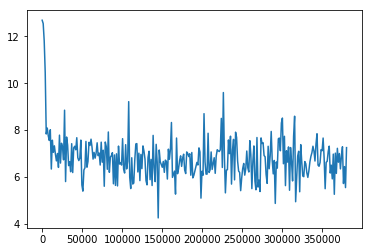

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import spline

%matplotlib inline

x = plots[0]
y = plots[1]

x_new = np.linspace(x.min(), x.max(), 300) #300 represents number of points to make between T.min and T.max

y_smooth = spline(x, y, x_new)

plt.plot(x_new, y_smooth)

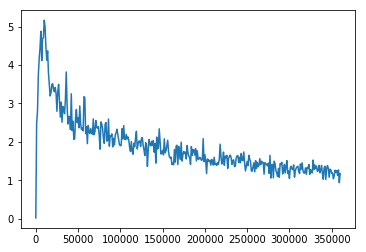

In [3]:
plt.plot(plots[0], plots[3])